# ITMAL Exercise

REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0208| CEF, minor text updata. 

## Implementing a dummy classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader you just created. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qa  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOLM], p82.

Split your data and run the fit-predict for the classifier using the MNIST data.

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print("X.shape=",X.shape) # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print("X.shape=",X.shape) # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == 5)    
y_test_5  = (y_test == 5)
```
instead of the `y`'s you are getting out of the dataloader...

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

In [1]:
# TODO: Qa...
import sys,os
#Add the folder above current workspace to the sys.path variable
sys.path.append(os.path.join(os.getcwd(), '..')) # OS inspecific

from libitmal import dataloaders
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Import and prepare data
X, y = dataloaders.MNIST_GetDataSet()

print("X.shape=",X.shape) # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print("X.shape=",X.shape) # X.shape= (70000, 784)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')

X.shape= (70000, 784)
X.shape= (70000, 784)


In [2]:
sgd_clf = SGDClassifier(random_state=42, max_iter = 1000, tol = 1e-3)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

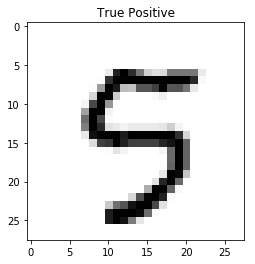

In [37]:
y_pred = sgd_clf.predict(X_test)
pred_hits = X_test[y_pred == True]

dataloaders.MNIST_PlotDigit(pred_hits[2], title = 'True Positive')

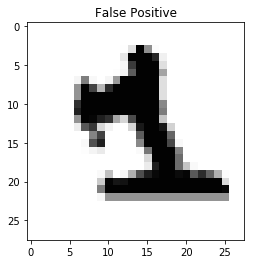

In [36]:
dataloaders.MNIST_PlotDigit(pred_hits[1], title = 'False Positive')

#### Qb Implement a dummy binary classifier

Follow the code found in [HOML], p84, but name you estimator `DummyClassifier` instead of `Never5Classifyer`.

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="Figs/class_base_estimator.png" style="width:500px">

All Scikit-learn classifiers inherit form `BaseEstimator` (and possible also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duct typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and try to compare the confusion matrix for both the dummy and SDG classifier.

We will be discussing the confusion matrix next, but first, print the `y_test_5.shape` and count the numbers of `y_test_5==True` and `y_test_5==False` and see if you can find these numbers in the confusion matrix.

In [52]:
# TODO: Qb
from libitmal import utils as itmalutils
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

class DummyClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), ), dtype = bool)

    
# Inspiration for running cross evaluation on a model, and printing the confusion matrix:
#c=cross_val_score(model, X_test, y_test_5, cv=3, scoring="accuracy")
#print("c=",c)
#M=confusion_matrix(y_test_true, y_test_pred)
#itmalutils.PrintMatrix(M,"M=")

# Test of SGDClassifier
c_sgd = cross_val_score(sgd_clf, X_test, y_test_5, cv=3, scoring="accuracy")
print('SGDClassifier:\nc = ', c_sgd)
M_sgd = confusion_matrix(y_test_5, sgd_clf.predict(X_test))
itmalutils.PrintMatrix(M_sgd, "M =")

print('\n')

# Test of DummyClassifier
dummy_clf = DummyClassifier() # No need to fit
c_dummy = cross_val_score(dummy_clf, X_test, y_test_5, cv=3, scoring="accuracy")
print('DummyClassifier:\nc = ', c_dummy)
M_dummy = confusion_matrix(y_test_5, dummy_clf.predict(X_test))
itmalutils.PrintMatrix(M_dummy, "M =")

SGDClassifier:
c =  [0.94237361 0.96120874 0.96442349]
M =[[12391   288]
    [  247  1074]]


DummyClassifier:
c =  [0.90486394 0.90679237 0.90527218]
M =[[12679     0]
    [ 1321     0]]


In [57]:
print('Shape of y_test_5: ',y_test_5.shape)

n_y_test_5_true = 0
n_y_test_5_false = 0
for e in y_test_5:
    if e == True:
        n_y_test_5_true = n_y_test_5_true + 1
    else:
        n_y_test_5_false = n_y_test_5_false + 1
        
print('Number of elements where y_test_5 is true: ', n_y_test_5_true)
print('Number of elements where y_test_5 is false: ', n_y_test_5_false)

Shape of y_test_5:  (14000,)
Number of elements where y_test_5 is true:  1321
Number of elements where y_test_5 is true:  12679
